%%HTML
<style>

.CodeMirror {
    width: 100vw;
}

.container {
    width: 99% !important;
}

.rendered_html {
  font-size:0.8em;
}
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 100%;
}

</style>

## Data Visualization
<br>
<center>
<img src="../images/ibm-logo-bw.png" alt="ibm-logo" align="center" style="width: 200px;"/>
</center>

The first steps of the EDA process are to summarize the data and use storytelling to connect the business opportunity to the data.  Data visualization is perhaps the most powerful tool at our disposal to help tell that story.  In this module we will use Jupyter notebooks to showcase several best practices surrounding data visualization.  This presentation is in fact a Jupyter notebook.

In [2]:
import re
import os
import numpy as np
import pandas as pd
import seaborn as sns
from termcolor import cprint
from IPython.display import Image
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')
%matplotlib inline

SMALL_SIZE = 10
MEDIUM_SIZE = 11
LARGE_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)   # fontsize of the figure title

def slide_print(text, color='white'):
    cprint(text, color, 'on_grey')

## Lesson Sections 

1. Data visualization and pandas
2. Data visualization best practices
3. Essentials of simple plots

<br></br>
> Keep in mind that data visualization must be carried out in a <span style="color:orange">reproducible</span> way and the end products are generally packaged into a deliverable that will be <span style="color:orange">communicated</span> to business stakeholders. 

This lesson is organized into 3 sections.  We will mainly focus on best practices as these contents assume that you are already familiar with pandas, matplotlib and Jupyter. We will quickly touch on some of the essential tools, but this is by no means a comprehensive survey of the data visualization landscape.  READ NOTE.  

### Advantages of Jupyter notebooks in EDA

* **They are portable**: can be run locally, on private servers, in public cloud, in <span style="color:orange">IBM Watson Studio</span>
* Support for [dozens of languages](https://github.com/jupyter/jupyter/wiki/Jupyter-kernels)
* They mix markdown with executable code 
* Integrated with the plotting library <span style="color:orange">matplotlib</span>
* Integrated with <span style="color:orange">pandas</span> and specifically the pandas <span style="color:orange">dataframes</span>

<br></br>
See the project [nbestimate](https://github.com/parente/nbestimate) to learn more about Jupyter notebooks 

There are other powerful tools like [Zeppelin](https://zeppelin.apache.org) and [RStudio](https://www.rstudio.com), but Jupyter has become an industry standard in the Python ecosystem. Currently, there are more than 5 million notebooks saved in GitHub.  Jupyter notebooks are portable and can be run in numerous environments.  They support for dozens of languages and they are integrated with both matplotlib and pandas---making them an ideal tool for EDA


<center>
<img src="../images/PythonVisLandscape.jpg" alt="python data vis landscape" align="center" style="width: 620px;"/>
</center>
<br></br>

Beyond simple plots: <span style="color:orange">bokeh, plot.ly, Folium and mpld3</span>

The image was created by Jake Vanderplas from the eScience institute for [an article originally presented at SciPy 2018](https://www.anaconda.com/python-data-visualization-2018-why-so-many-libraries).

There are numerous frameworks out there and it is reasonable to use other languages, like R, to carry out data visualization.  With respect to the Python ecosystem though matplotlib is most common tool once you have accounted for direct and indirect usage.  This vizualization helps provide some perspective.  Below the graphic we highlight some of the tools that are commonly used when simple plots are not just not adequate.  For these materials we will focus on the use of simple plots and for this the libraries `matplotlib` and `seaborn` are the most widely used.

# BREAK

END OF PART 1

# EDA and pandas

In [3]:
## load the data and print the shape
df = pd.read_csv(os.path.join("..","data/world-happiness.csv"),index_col=0)
slide_print("df: {} x {}".format(df.shape[0],df.shape[1]))
slide_print(df.columns.tolist())


## clean up and truncate for visualization
df.columns = [re.sub("\s+","_",col).lower() for col in df.columns.tolist()]
columns =['country','region','happiness_score',
          'economy_(gdp_per_capita)',
          'health_(life_expectancy)','year','family']

## rename columns for visualization
df = df.loc[:,columns]
df.rename(columns={'health_(life_expectancy)':'health',
                   'happiness_score': 'happiness',
                   'economy_(gdp_per_capita)':'economy'}, inplace=True);
slide_print("df: {} x {}".format(df.shape[0],df.shape[1]))
slide_print(df.columns.tolist())

df: 495 x 12
['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual', 'Year']
df: 495 x 7
['country', 'region', 'happiness', 'economy', 'health', 'year', 'family']


<small>These data are produced by the UN Sustainable Development Solutions Network and the report is compiled and available at https://worldhappiness.report</small>.

We are going to use the worldhappiness dataset for this lesson.  This is a commonly used data set to practice EDA.  There is a very specific target variable that does not require domain knowledge... namely 'happiness'.  Each observation is a country at a given year.  The code shown here loads the data from a csv file into a pandas dataframe.  Once loaded the columns are cleaned up using regular expressions and the convenient method `rename`.  We truncate both the names and the dataframe itself for visualization purposes and the outputs show the exact changes.

In [4]:
## check the first few rows
df.head(n=4).round(3)

,country,region,happiness,economy,health,year,family
0,Afghanistan,Southern Asia,3.575,0.320,0.303,2015,0.303
1,Albania,Central and Eastern Europe,4.959,0.879,0.813,2015,0.804
2,Algeria,Middle East and Northern Africa,5.605,0.939,0.618,2015,1.078
3,Angola,Sub-Saharan Africa,4.033,0.758,0.167,2015,0.860


The source website notes that this is a landmark survey of the state of global happiness that ranks over 150 countries by how happy their citizens perceive themselves to be.  The data from the 2015-2017 reports are in the csv file.  The goal in a business scenario is to tell the story of the the data.  Often for a data science project there will be business metric that we are trying to improve.  If we think of happiness in this case as revenue or profit and the countries as different products then this dataset starts to look like something that is pretty common in business.

In [5]:
df.sort_values(['year', "happiness"], ascending=[True, False], inplace=True)
df.head(n=10)

,country,region,happiness,economy,health,year,family
141,Switzerland,Western Europe,7.587,1.39651,0.94143,2015,1.34951
60,Iceland,Western Europe,7.561,1.30232,0.94784,2015,1.40223
38,Denmark,Western Europe,7.527,1.32548,0.87464,2015,1.36058
108,Norway,Western Europe,7.522,1.45900,0.88521,2015,1.33095
25,Canada,North America,7.427,1.32629,0.90563,2015,1.32261
46,Finland,Western Europe,7.406,1.29025,0.88911,2015,1.31826
102,Netherlands,Western Europe,7.378,1.32944,0.89284,2015,1.28017
140,Sweden,Western Europe,7.364,1.33171,0.91087,2015,1.28907
103,New Zealand,Australia and New Zealand,7.286,1.25018,0.90837,2015,1.31967
6,Australia,Australia and New Zealand,7.284,1.33358,0.93156,2015,1.30923


If the target or businees metric is `happiness` then it makes sense to look at the sorted data.  These data were first sorted on `year` in ascending order then on the `happiness_index` in descending order. It is reasonable expect that the features shown would play a role in explaining a countries perceived happiness.  This is a good point to note that that sorting and more in general any manipulation on spreadsheet like data should exist as code to ensure reproducibility.  There are several high profile cases of published academic work being retracted, because of these types of manipulations were done using a mouse from within a spreadsheet tool.

## Pivot tables and groupbys

In [6]:
columns_to_show = ["happiness","health","economy","family"]
pd.pivot_table(df, index= 'year',values=columns_to_show,aggfunc='mean').round(3)

,economy,family,happiness,health
year,,,,
2015,0.846,0.991,5.376,0.630
2016,0.954,0.794,5.382,0.558
2017,0.985,1.189,5.354,0.551


Pandas is an incredible tool to carry out the programmatic manipulation of data.  The pandas documentation is also quite good compared to other packages and there is a lot of built in functionality. Pivot tables and groupbys are methods that perform aggregations over a pandas DataFrame. There are some differences between pivot_table and groupby, but either can be used to create aggregate summary tables. See the pandas tutorial on reshaping and pivots to learn more. Also note that you can have more than one index.

## Multi-index pivot tables

In [7]:
pd.pivot_table(df, index = ['region', 'year'], values=columns_to_show).round(3).iloc[:12,:]

economy  family  happiness  health
region                      year                                    
Australia and New Zealand   2015    1.292   1.314      7.285   0.920
                            2016    1.403   1.139      7.323   0.841
                            2017    1.445   1.529      7.299   0.830
Central and Eastern Europe  2015    0.942   1.053      5.333   0.719
                            2016    1.048   0.862      5.371   0.632
                            2017    1.092   1.282      5.410   0.636
Eastern Asia                2015    1.152   1.099      5.626   0.877
                            2016    1.277   0.910      5.624   0.807
                            2017    1.319   1.311      5.647   0.808
Latin America and Caribbean 2015    0.877   1.105      6.145   0.704
                            2016    0.993   0.898      6.102   0.613
                            2017    1.007   1.290      5.958   0.611

In this slide we show another aggregration except now it is done over both region and year.  The table is truncated after four regions because it does not fit on a slide.  Longer summary tables can be useful in reports and dashboards, but it is often the case that a simple plot will do a better job of telling the story of the data.
There are a few other best practices in EDA to keep in mind.  

### Data Visualization Best Practices

1. Keep your code-base separated from your notebooks

  * <span style="color:orange">executable scripts</span>, modules, packages
  
2. Keep a notebook or a record of plots and plot manipulations

  * Use <span style="color:orange">galleries</span> and create your own
  
3. Use your plots as a quality assurance tool

  * Think before you click

Remember to save a maximum amount of code within files, even when using Jupyter.  Version control is a key component to effective collaboration and reproducible research.  Example of plots that you frequently create should be saved in a repository or folder as resource---it will save you time.  The final guideline here is to make an educated guess before you see the plot.  This habit is surprisingly useful for quality assurance of both data and code.

BREAK

End of part 2

# Essentials of simple plots

<br>
<center>
<img src="../images/matplotlib.png" alt="ibm-logo" align="center" style="width: 100px;"/>
</center>

* `pandas` visualization
* matplotlib <span style="color:orange">pyplot</span> interface
* matplotlib <span style="color:orange">artist</span> interface
* other packages like `seaborn` are build on top

Matplotlib has a "functional" interface similar to MATLAB® that works via the pyplot module for simple interactive use, as well as an object-oriented interface that is more pythonic and better for plots that require some level of customization or modification. The latter is called the artist interface. There is also built in functionality from within pandas for rapid access to plotting capabilities.  And we will see shortly an example of the seaborn library, which is essentially an extension of matplotlib.

# Summarizing pivot tables with simple plots
<br></br>

<br></br>
* [matplotlib tutorial](https://matplotlib.org/3.1.1/tutorials/index.html)
* [matplotlib gallery](https://matplotlib.org/3.1.1/gallery/index.html)

We are only going to touch on a few key data visualization techniques and one of them specifically deals with turning your summary tables into simple plots.  There are many resources available to help you get better at plotting.  The official matplotlib tutorials and gallery are a good place to start. 

In [8]:
def make_summary_plot_from_pandas():
    """
    plot pivot table summary data from happiness example
    """

    f, axes = plt.subplots(1, 2, sharey=False, figsize=(14, 6),dpi=100,facecolor='white')
    
    ## create plot
    table1 = pd.pivot_table(df,index='region',columns='year',values="happiness").plot(kind='bar',ax=axes[0])
    table2 = pd.pivot_table(df,index='region',columns='year',values="health").plot(kind='bar',ax=axes[1])
        
    ## modify axes
    axes[0].set_ylabel("Happiness Score")
    axes[1].set_ylabel("Health (Life_Expectancy)")
    axes[0].set_ylim((0,9.9))
    axes[1].set_ylim((0,1.4));

We see here the pandas interface to matplotlib in the dot plot method.  There are some interface limitations when it comes to using this interface for plotting, but it serves as an efficient first pass. You also see that we are encapsulating the plotting code as a function so that it may be hidden if this notebook were to be used as a presentation. 

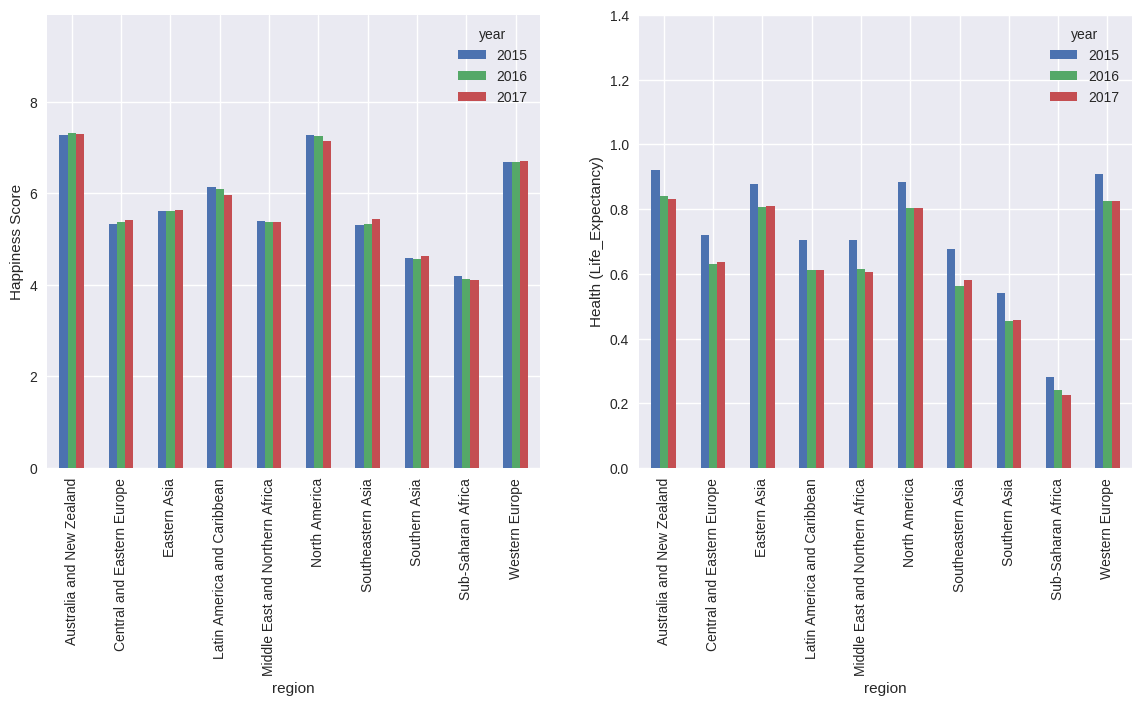

In [9]:
make_summary_plot_from_pandas()

Exposed plot generation and other code can limit effective communication. In keeping with the best practices of storing code in text files for version control as well as the cataloging of plot code the next version of this plot will make explicit use a python script.  It will also showcases some of the additional functionality available through the matplotlib artist interface.

... data ingestion
... creating plot
../images/happiness-summary-dark.png created.


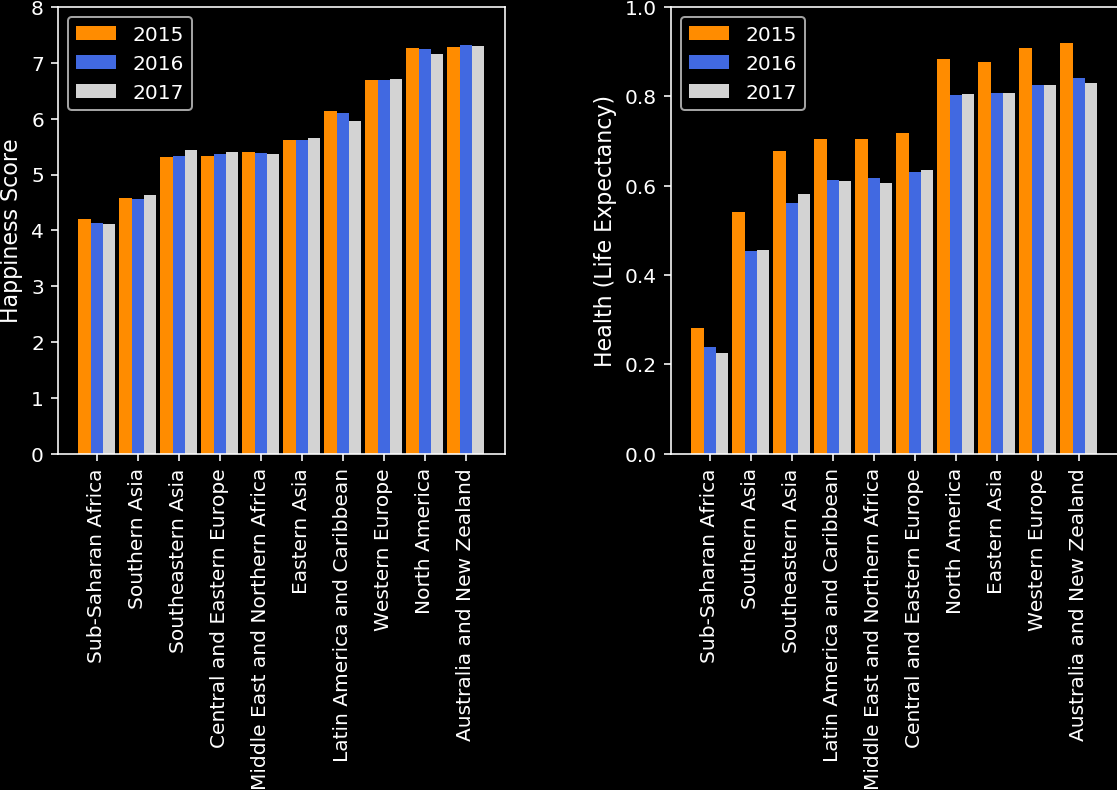

In [10]:
!python ../scripts/make-happiness-summary-plot-dark.py
Image("../images/happiness-summary-dark.png")

This file was created from a script. **TOGGLE**.  This Python script is meant to be run directly from the command line which means it can be called from Jupyter as well.  The script is conceptually organized through the use of functions.  The function `create_plot` uses the function `create_subplot` and the data ingestion exists as it own function. **TOGGLE** The result is a more refined and very customizable summary pivot table.

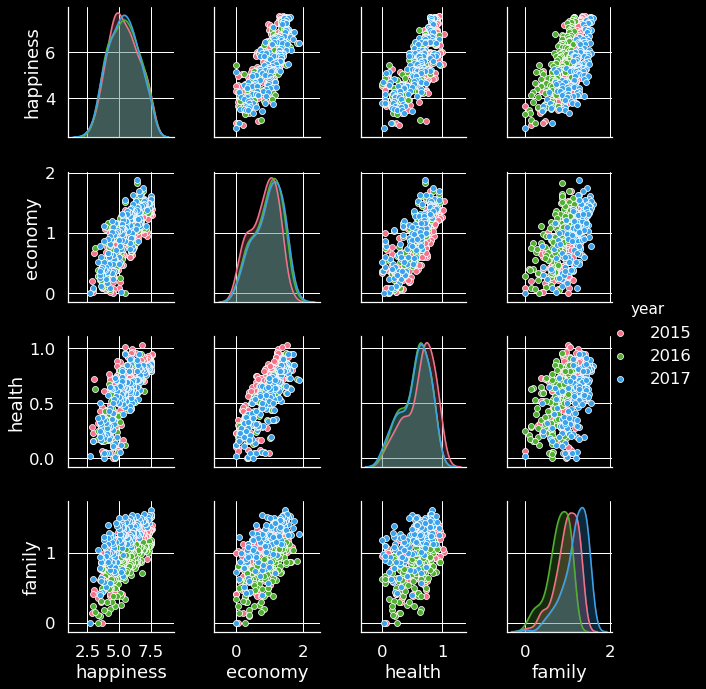

In [152]:
## make a pair plot
columns = ['happiness','economy', 'health','family']
sns.set(font_scale=1.5)
with plt.style.context('dark_background'):
    axes = sns.pairplot(df,vars=columns,hue="year",palette="husl")
    axes.fig.set_size_inches(10,10)

This pair plot was produced directly from the dataframe with minimal code seaborn code.  We also modify the css to match the presentation theme. Pair plots are a powerful tool to summarize the relationships among features. This is another example of a simple plot.  Simple plots are quick to produce, quick to modify and can be saved in multiple formats. When we refer to a plot as a simple plot it does not necessary mean that it lacks complexity---for lack of a better term it implies that it can be produced quickly and saved in a portable format.  Dashboards, interactive plots and really any environment where a plot is no longer portable is where the term simple plots no longer apply.